# Lending Cub

2 Clasificaciones: Default y fully paid, revisar 20 features, escogerlos
* 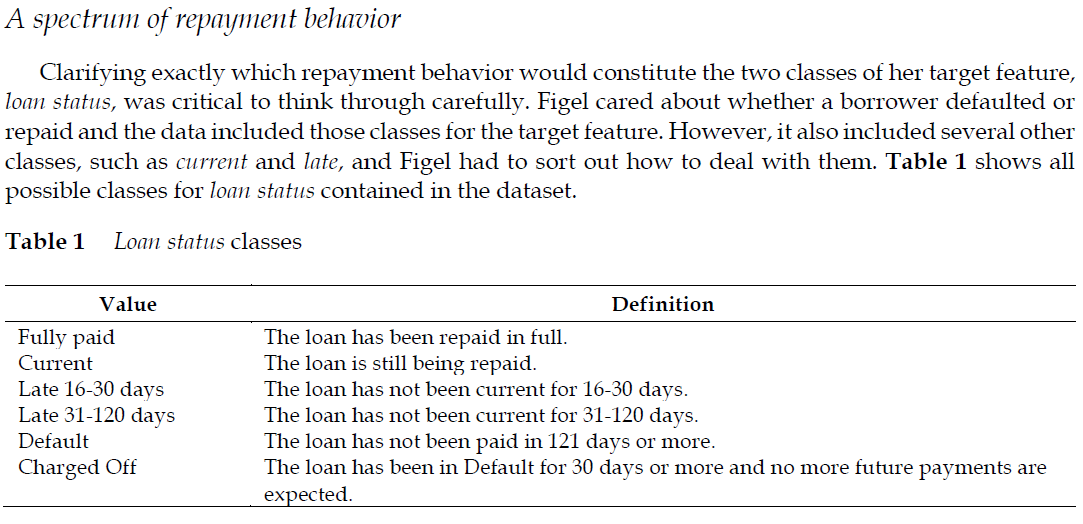

In [2]:
# Importación de paquetes
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Extracción de la base
df = pd.read_csv('D:/Descargas/accepted_2007_to_2018Q4.csv',sep=',')

In [4]:
#Revisamos la base
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df.shape

(2260701, 151)

In [6]:
#revisamos nulos
df.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

In [7]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isna().mean() * 100

# Mostrar el resultado
porcentaje_nulos.sort_values(ascending=False)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_reason                                99.517097
hardship_payoff_balance_amount                 99.517097
hardship_last_payment_amount                   99.517097
payment_plan_start_date                        99.517097
hardship_type                                  99.517097
hardship_status                                99.517097
hardship_start_date                            99.517097
deferral_term                                  99.517097
hardship_amount                                99.517097
hardship_dpd                                   99.517097
hardship_loan_status                           99.517097
hardship_length                                99.517097
hardship_end_date                              99.517097
settlement_status                              98.485160
debt_settlement_flag_date                      98.485160
settlement_term                

In [8]:
#Eliminamos variables sin datos
df = df.drop(columns={'member_id',"orig_projected_additional_accrued_interest",
    "hardship_end_date",
    "hardship_start_date",
    "hardship_type",
    "hardship_reason",
    "hardship_status",
    "deferral_term",
    "hardship_amount",
    "hardship_last_payment_amount",
    "hardship_payoff_balance_amount",
    "hardship_loan_status",
    "hardship_dpd",
    "hardship_length",
    "payment_plan_start_date",
    "settlement_term",
    "debt_settlement_flag_date",
    "settlement_status",
    "settlement_date",
    "settlement_amount",
    "settlement_percentage",
    "sec_app_mths_since_last_major_derog",
    "sec_app_revol_util",
    "revol_bal_joint",
    "sec_app_mort_acc",
    "sec_app_fico_range_low",
    "sec_app_fico_range_high",
    "sec_app_earliest_cr_line",
    "sec_app_inq_last_6mths",
    "sec_app_chargeoff_within_12_mths",
    "sec_app_open_acc",
    "sec_app_open_act_il",
    "sec_app_num_rev_accts",
    "sec_app_collections_12_mths_ex_med",
    "verification_status_joint",
    "dti_joint",
    "annual_inc_joint",
    "desc",
    "mths_since_last_record",
    "mths_since_recent_bc_dlq",
    "mths_since_last_major_derog",
    "mths_since_recent_revol_delinq",
    "next_pymnt_d",
    "mths_since_last_delinq",
    "il_util",
    "mths_since_rcnt_il"})

In [9]:
#revisamos los nombres de las columnas restantes
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=105)

In [10]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,12609.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0

In [11]:
# Obseramos el tamaño de la base
df.shape

(2260701, 105)

Segundo filtrado

In [12]:
# Revisamos nulos
df.isnull().sum()

id                                 0
loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
term                              33
int_rate                          33
installment                       33
grade                             33
sub_grade                         33
emp_title                     167002
emp_length                    146940
home_ownership                    33
annual_inc                        37
verification_status               33
issue_d                           33
loan_status                       33
pymnt_plan                        33
url                               33
purpose                           33
title                          23359
zip_code                          34
addr_state                        33
dti                             1744
delinq_2yrs                       62
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
i

In [13]:
# Eliminamos filas con nulos
df= df.dropna()

In [14]:
#Revisamos tamaño de la base
df.shape

(1026715, 105)

In [15]:
# Revisamos que no haya nulos
df.isnull().sum().sum()

np.int64(0)

In [16]:
#Revisamos base
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
6,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,550xx,MN,14.67,0.0,Jun-1990,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,0.0,21393.800000,21393.80,20000.0,1393.80,0.0,0.0,0.0,Nov-2016,15681.05,Mar-2019,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,29433.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,

In [17]:
# Revisamos el sentido de los estatus
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

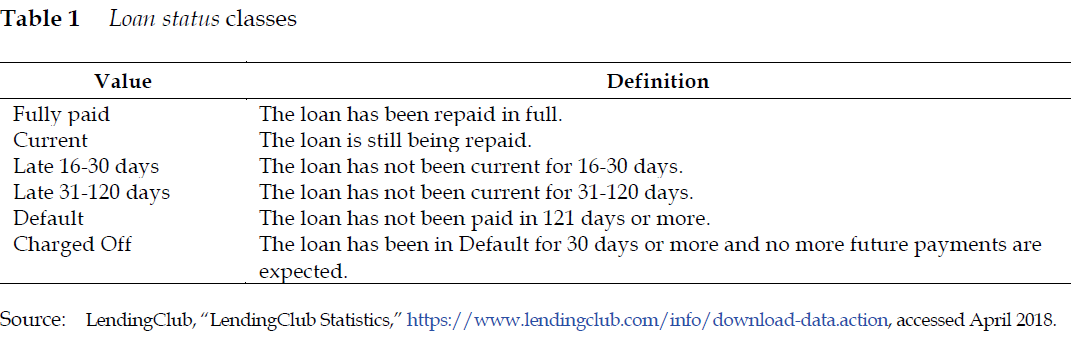

In [18]:
df['objetivo'] = df['loan_status'].apply(lambda x: 0 if x == 'Current'
                                                    else 0 if x == 'Fully Paid'
                                                    else 0 if x == 'In Grace Period'
                                                    else 1)

In [19]:
df['objetivo'].unique()

array([0, 1])

## Revisión estadística

Correlación entre variables

In [20]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'objetivo'],
      dtype='object', length=106)

In [21]:
df.columns.tolist()

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'open_rv_12m',


In [22]:
df1=df

In [23]:
df1.drop(columns={'loan_status'},inplace=True)

In [25]:
import seaborn as sns

## Conversión a numericos

Identificación de variables categóricos

In [26]:
df2= df1[[ 'loan_amnt','term','int_rate','installment','emp_title','home_ownership','annual_inc','objetivo','pymnt_plan','zip_code','dti','delinq_2yrs',
    'fico_range_low','fico_range_high','revol_bal','revol_util','total_pymnt','last_pymnt_d','last_pymnt_amnt','application_type','tot_hi_cred_lim',
    'total_bc_limit','hardship_flag','debt_settlement_flag']]

In [27]:
df2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'home_ownership', 'annual_inc', 'objetivo', 'pymnt_plan', 'zip_code',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_d', 'last_pymnt_amnt',
       'application_type', 'tot_hi_cred_lim', 'total_bc_limit',
       'hardship_flag', 'debt_settlement_flag'],
      dtype='object')

In [28]:
df2.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
emp_title                object
home_ownership           object
annual_inc              float64
objetivo                  int64
pymnt_plan               object
zip_code                 object
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
revol_bal               float64
revol_util              float64
total_pymnt             float64
last_pymnt_d             object
last_pymnt_amnt         float64
application_type         object
tot_hi_cred_lim         float64
total_bc_limit          float64
hardship_flag            object
debt_settlement_flag     object
dtype: object

In [29]:
#Ajustamos el dato de la variable de Y - Convertimos a categorías
df2.loc[df2["objetivo"] == 1.0, "objetivo"] = 'yes'

In [30]:
df2.loc[df2["objetivo"] == 0.0, "objetivo"] = 'no'

In [31]:
# Revisamos que se ajustó la variable
df2["objetivo"].unique()

array(['no', 'yes'], dtype=object)

### Variables categóricas

In [32]:
# Filtrar solo las columnas categóricas
df2_categoricas = df2.select_dtypes(include=['object', 'category'])

In [33]:
df2_categoricas.columns

Index(['term', 'emp_title', 'home_ownership', 'objetivo', 'pymnt_plan',
       'zip_code', 'last_pymnt_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

### Variables numéricas

In [34]:
# Filtrar solo las columnas categóricas
df2_numericas = df2.select_dtypes(include=['int', 'float64'])

In [35]:
df2_numericas.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_amnt', 'tot_hi_cred_lim',
       'total_bc_limit'],
      dtype='object')

### Graficar variables categoricas

In [36]:
#renombrar las variables categoricas
# Quitamos los zipcodes
cat_vars =['term', 'emp_title', 'home_ownership', 'objetivo', 'pymnt_plan',
        'last_pymnt_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag']

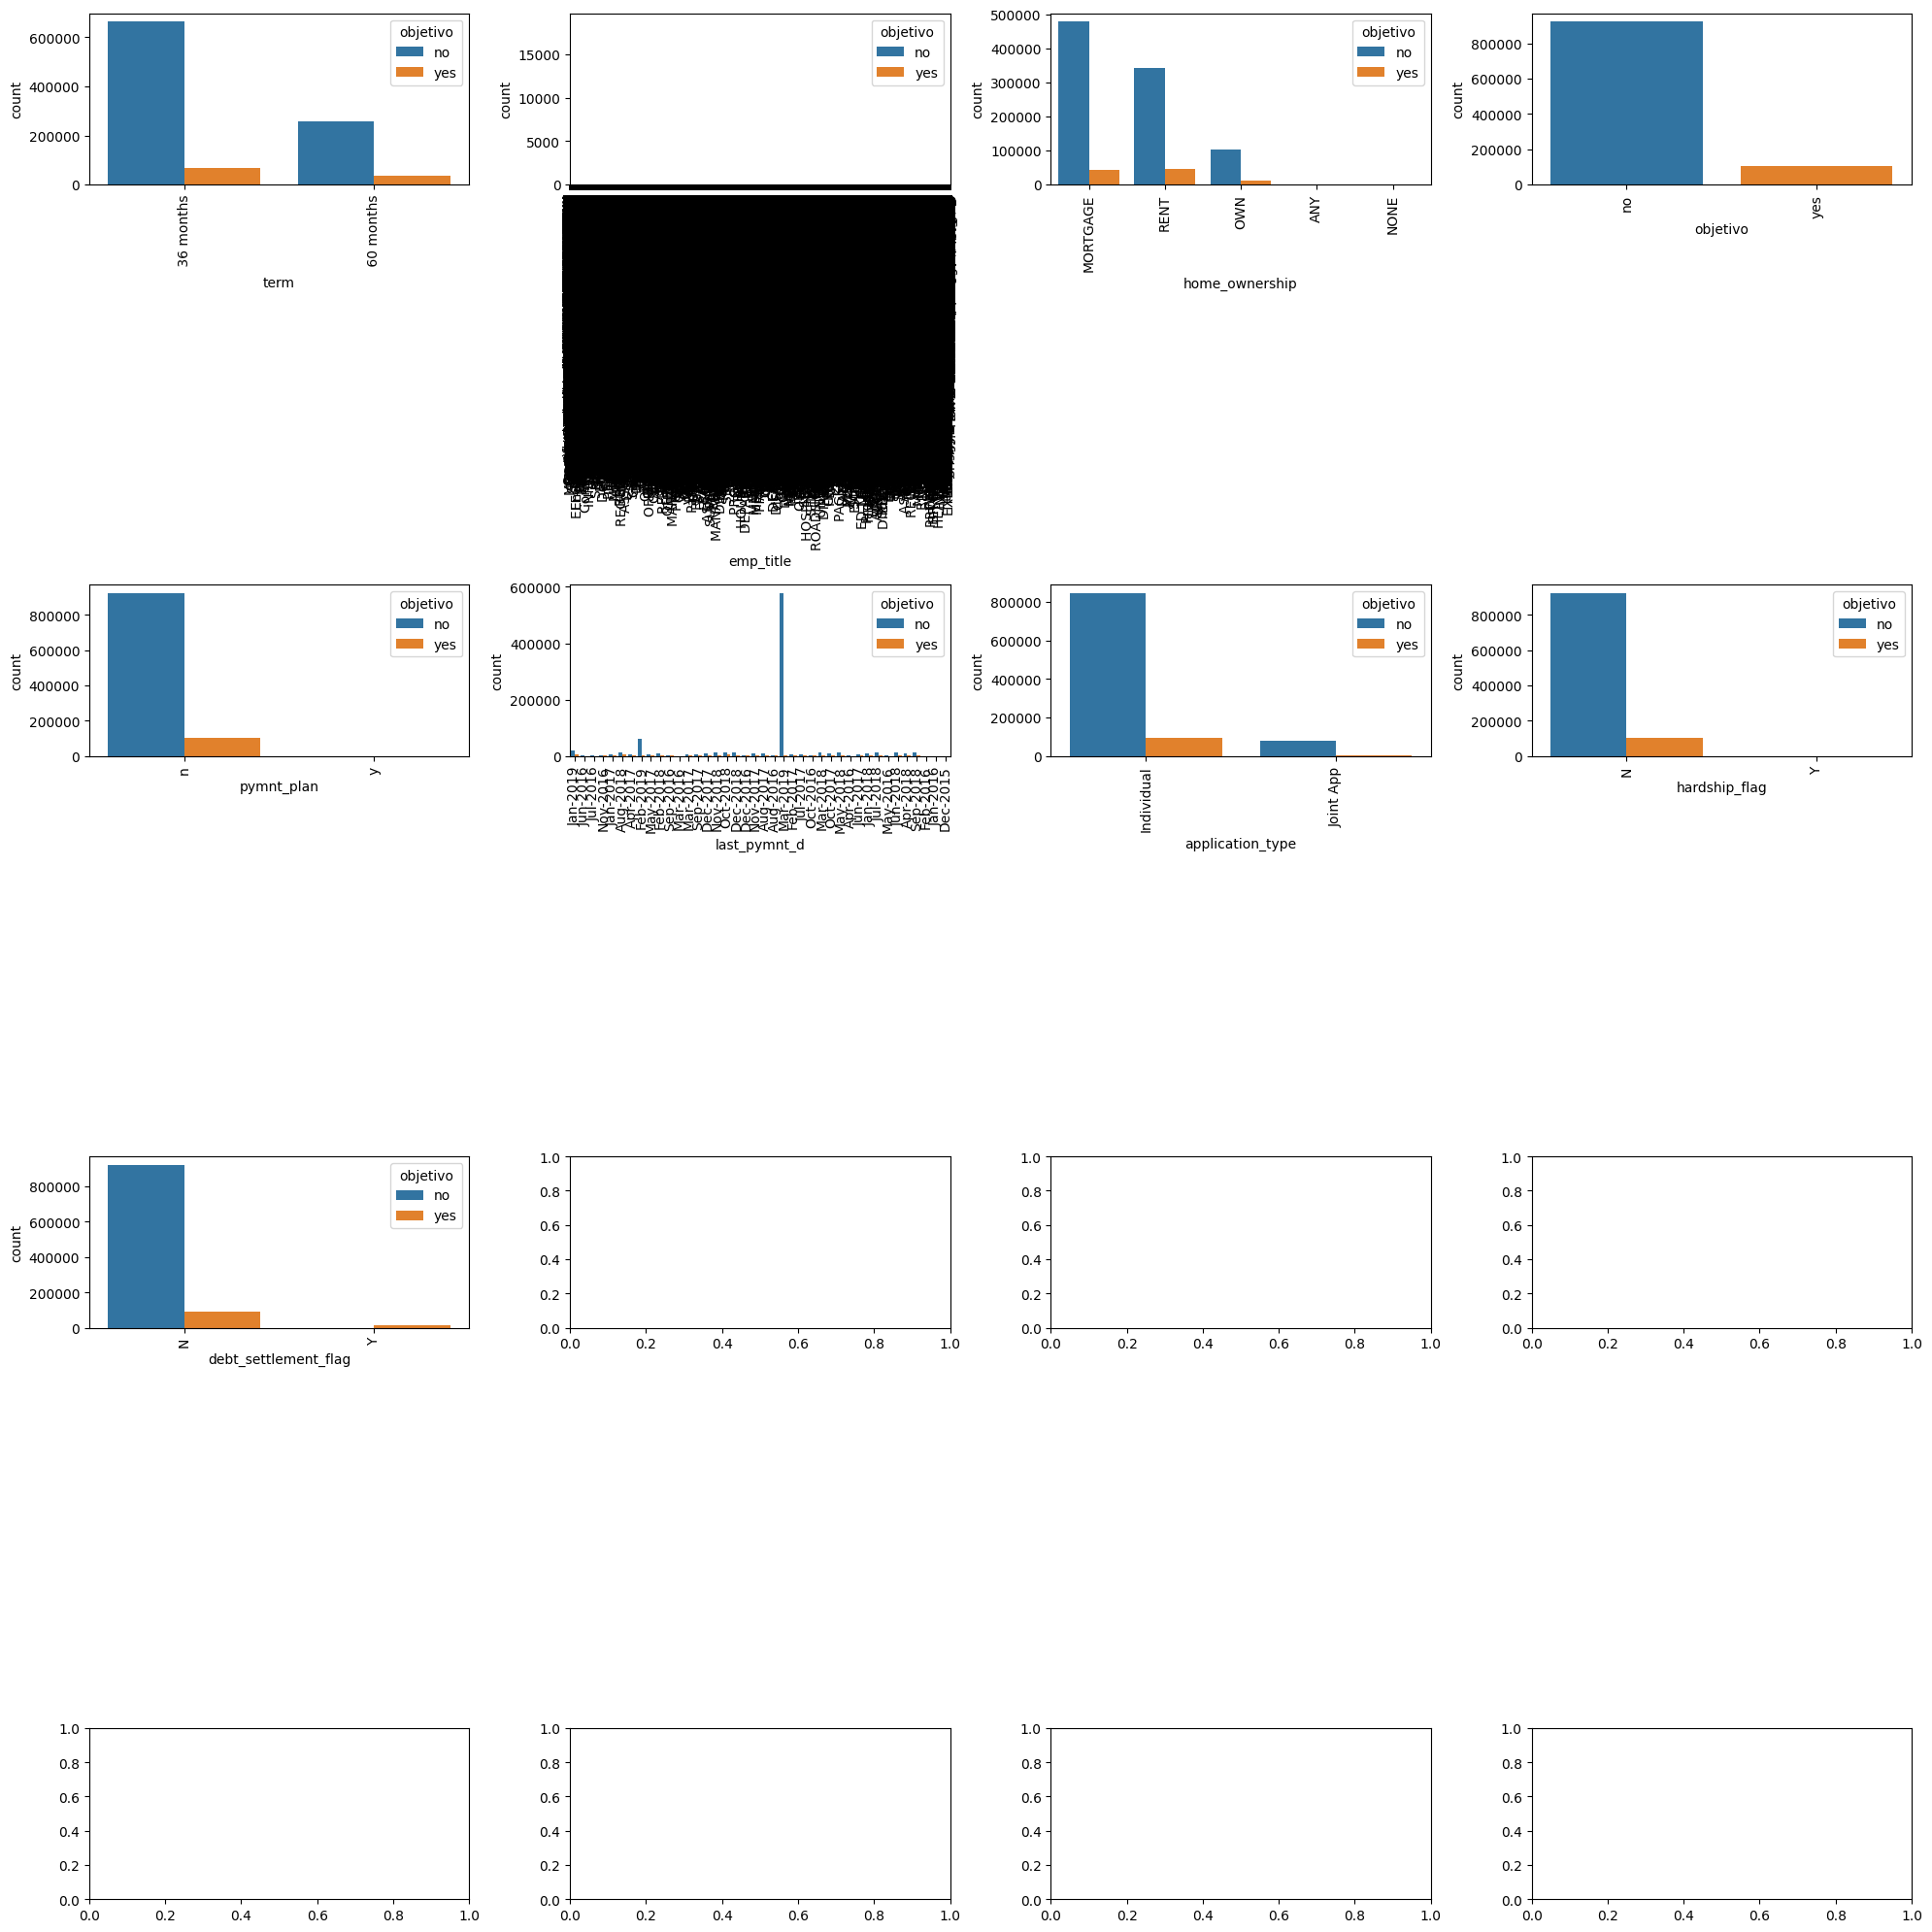

In [37]:

#Crear figuras con subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (20, 20))
axs = axs.flatten()

#Crear un countplot para cada variable categorica 
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue="objetivo", data = df2_categoricas, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
#Ajustar espacio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

Graficar variables numéricas

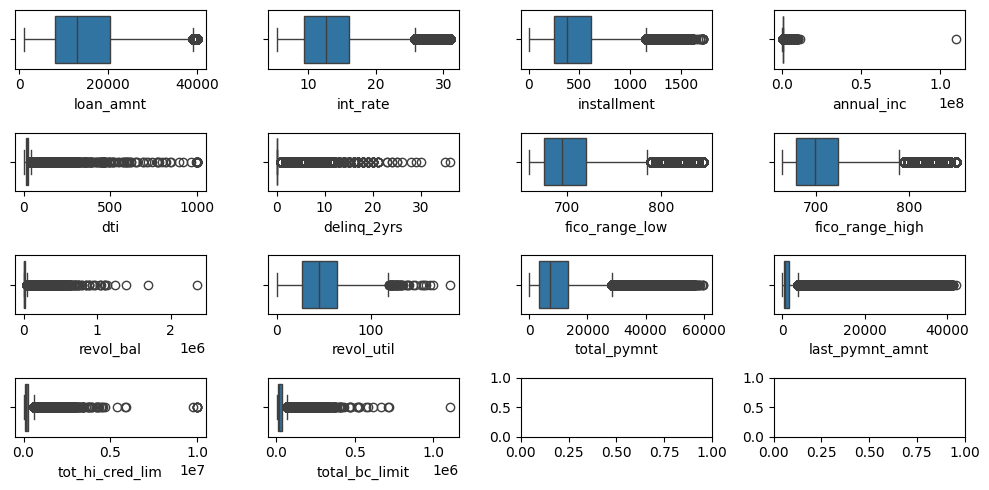

In [38]:
num_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_amnt', 'tot_hi_cred_lim',
       'total_bc_limit']

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=df2_numericas, ax=axs[i])
    
fig.tight_layout()
    
plt.show()


## Procesamiento de datos

In [39]:
df2_categoricas.columns

Index(['term', 'emp_title', 'home_ownership', 'objetivo', 'pymnt_plan',
       'zip_code', 'last_pymnt_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [40]:
df2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [41]:
df2['emp_title'].unique()

array(['leadman', 'Engineer', 'Contract Specialist', ...,
       'Sr. Photo Producer', 'Exec Dir Internal Audit',
       'Current Operations Officer'], dtype=object)

In [42]:
df2['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'], dtype=object)

In [43]:
df2['objetivo'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
df2['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [45]:
df2['zip_code'].unique()

array(['190xx', '577xx', '174xx', '550xx', '293xx', '160xx', '029xx',
       '290xx', '786xx', '916xx', '299xx', '226xx', '856xx', '117xx',
       '219xx', '297xx', '100xx', '214xx', '750xx', '672xx', '125xx',
       '880xx', '238xx', '354xx', '993xx', '212xx', '636xx', '215xx',
       '441xx', '300xx', '606xx', '331xx', '802xx', '945xx', '984xx',
       '462xx', '761xx', '493xx', '330xx', '707xx', '644xx', '471xx',
       '200xx', '015xx', '453xx', '546xx', '936xx', '210xx', '134xx',
       '112xx', '440xx', '460xx', '430xx', '128xx', '958xx', '220xx',
       '350xx', '472xx', '085xx', '197xx', '774xx', '447xx', '752xx',
       '434xx', '670xx', '016xx', '381xx', '850xx', '482xx', '070xx',
       '030xx', '023xx', '347xx', '436xx', '432xx', '604xx', '660xx',
       '681xx', '661xx', '439xx', '431xx', '973xx', '477xx', '377xx',
       '301xx', '323xx', '282xx', '986xx', '245xx', '910xx', '544xx',
       '461xx', '136xx', '355xx', '207xx', '448xx', '913xx', '551xx',
       '010xx', '481

In [46]:
df2['last_pymnt_d'].unique()

array(['Jan-2019', 'Jun-2016', 'Jul-2016', 'Nov-2016', 'Jan-2017',
       'Aug-2018', 'Apr-2017', 'Feb-2019', 'May-2017', 'Feb-2018',
       'Sep-2016', 'Mar-2016', 'Mar-2017', 'Sep-2017', 'Dec-2017',
       'Nov-2018', 'Oct-2018', 'Dec-2018', 'Dec-2016', 'Nov-2017',
       'Aug-2017', 'Aug-2016', 'Mar-2019', 'Feb-2017', 'Jul-2017',
       'Oct-2016', 'Mar-2018', 'Oct-2017', 'May-2018', 'Apr-2016',
       'Jun-2017', 'Jan-2018', 'Jul-2018', 'May-2016', 'Jun-2018',
       'Apr-2018', 'Sep-2018', 'Feb-2016', 'Jan-2016', 'Dec-2015'],
      dtype=object)

In [47]:
df2['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [48]:
df2['hardship_flag'].unique()

array(['N', 'Y'], dtype=object)

In [49]:
df2['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

### Transformar datos

In [50]:
#Observamos las variables del dataframe
df2_categoricas.columns

Index(['term', 'emp_title', 'home_ownership', 'objetivo', 'pymnt_plan',
       'zip_code', 'last_pymnt_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [52]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['term']= label_encoder.fit_transform(df2['term'])
df2['term'].unique()

array([0, 1])

In [53]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['emp_title']= label_encoder.fit_transform(df2['emp_title'])
df2['emp_title'].unique()

array([224448,  67418,  42285, ..., 186237,  69786,  46286])

In [54]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['home_ownership']= label_encoder.fit_transform(df2['home_ownership'])
df2['home_ownership'].unique()

array([1, 4, 3, 0, 2])

In [55]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['pymnt_plan']= label_encoder.fit_transform(df2['pymnt_plan'])
df2['pymnt_plan'].unique()

array([0, 1])

In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['zip_code']= label_encoder.fit_transform(df2['zip_code'])
df2['zip_code'].unique()

array([181, 535, 165, 509, 281, 151,  22, 278, 730, 841, 287, 215, 794,
       108, 208, 285,  91, 203, 695, 622, 116, 812, 227, 341, 916, 202,
       590, 204, 423, 288, 561, 319, 746, 868, 907, 443, 706, 474, 318,
       653, 596, 452, 190,   8, 435, 505, 860, 200, 125, 103, 422, 441,
       412, 119, 881, 209, 338, 453,  77, 187, 718, 429, 697, 416, 620,
         9, 367, 788, 463,  62,  23,  16, 335, 418, 414, 559, 610, 631,
       611, 421, 413, 896, 458, 363, 289, 311, 270, 909, 234, 835, 503,
       442, 127, 342, 197, 430, 838, 510,   3, 462, 344, 201,  80, 322,
       315, 102, 851, 129, 854, 715, 670, 163, 310, 196, 104, 223, 820,
       137, 239,  24, 231,  31, 864, 334, 357, 726, 182, 847, 831,  95,
       149, 282, 880,  13, 449, 744,  74, 522, 175, 444, 556, 842, 562,
       155, 903, 879, 220, 513, 717, 555, 696, 650, 863, 890, 853, 790,
       131, 258,  21, 290, 491, 749,  72, 469, 362, 862, 268,  20, 291,
       191, 211, 464, 352, 107, 572, 817, 818, 705, 750, 471, 56

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['last_pymnt_d']= label_encoder.fit_transform(df2['last_pymnt_d'])
df2['last_pymnt_d'].unique()

array([17, 21, 18, 31, 15,  5,  1, 13, 29, 12, 37, 24, 25, 38,  8, 33, 36,
        9,  7, 32,  4,  3, 27, 11, 19, 34, 26, 35, 30,  0, 22, 16, 20, 28,
       23,  2, 39, 10, 14,  6])

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['application_type']= label_encoder.fit_transform(df2['application_type'])
df2['application_type'].unique()

array([0, 1])

In [59]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['hardship_flag']= label_encoder.fit_transform(df2['hardship_flag'])
df2['hardship_flag'].unique()

array([0, 1])

In [60]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['debt_settlement_flag']= label_encoder.fit_transform(df2['debt_settlement_flag'])
df2['debt_settlement_flag'].unique()

array([0, 1])

Reconvertimos el objetivo a 1 y 0

In [61]:
#Ajustamos el dato de la variable de Y - Convertimos a categorías
df2.loc[df2["objetivo"] == 'yes', "objetivo"] = 1

In [62]:
#Ajustamos el dato de la variable de Y - Convertimos a categorías
df2.loc[df2["objetivo"] == 'no', "objetivo"] = 0

In [63]:
df2["objetivo"].unique()

array([0, 1], dtype=object)

<Axes: >

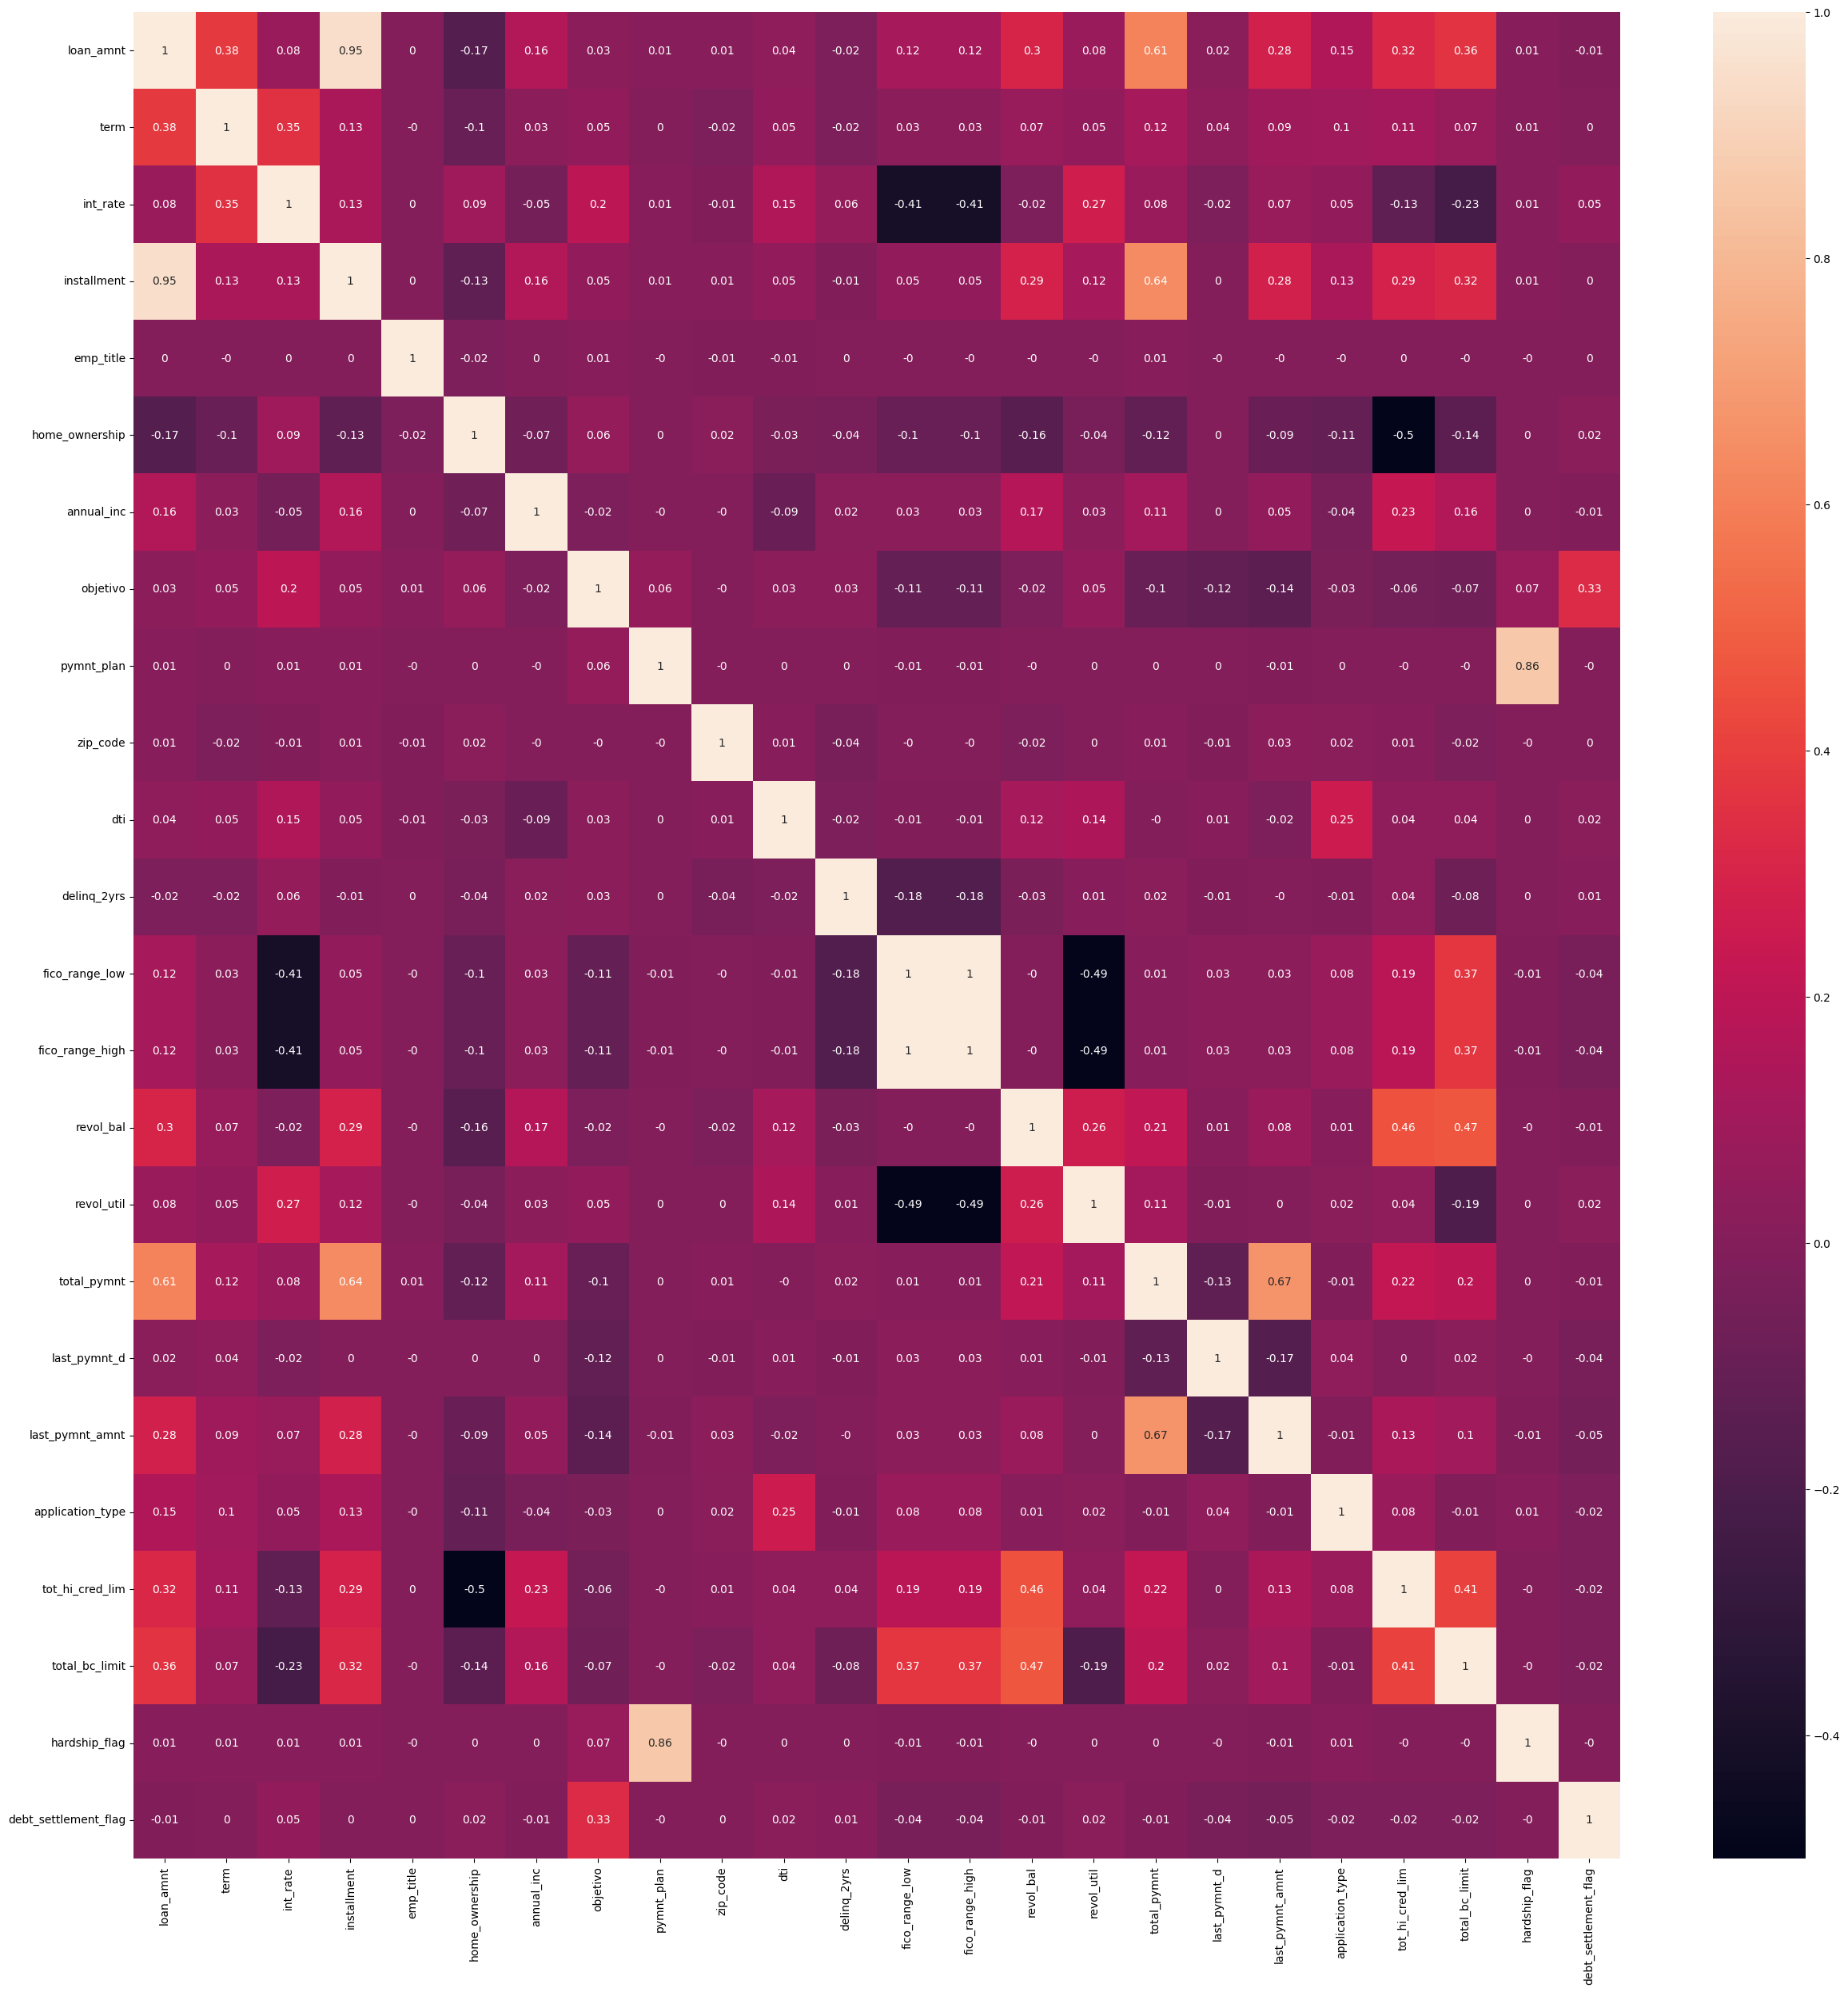

In [64]:
plt.figure(figsize=(30, 30))
sns.heatmap(df2.corr().round(2), fmt='.2g', annot=True)

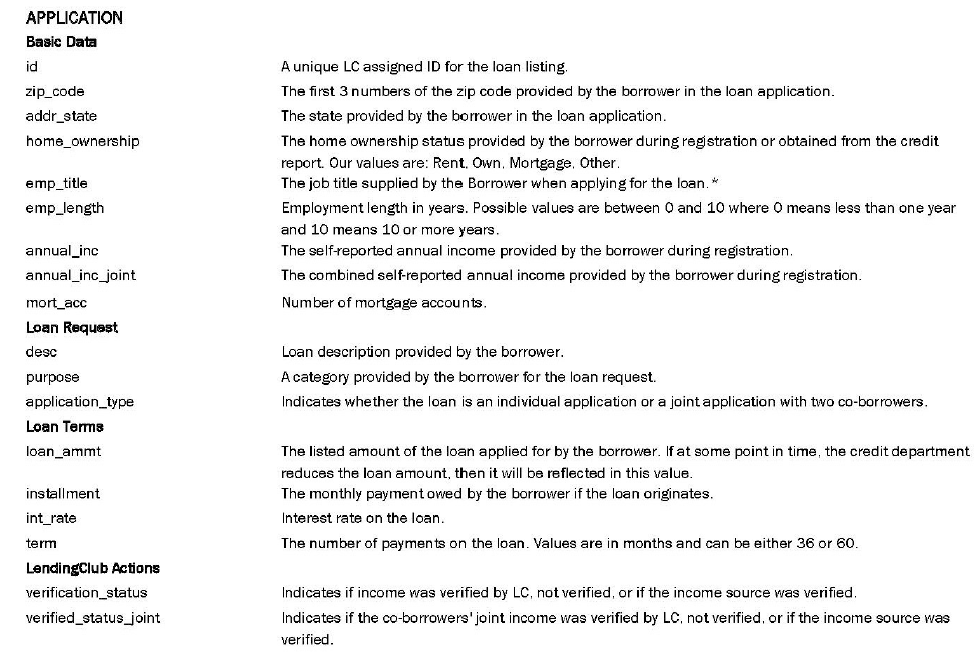

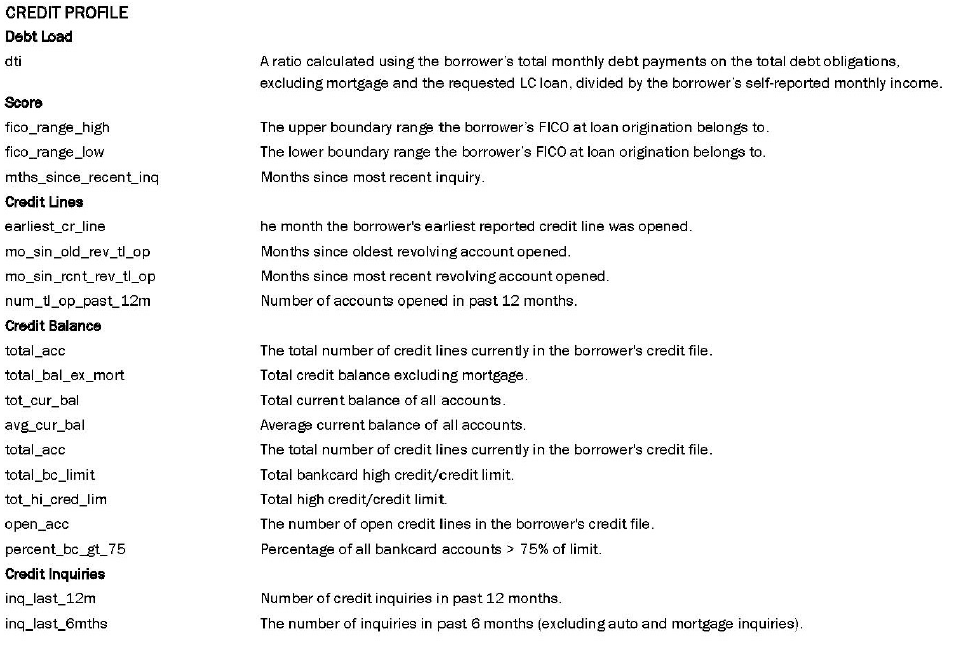

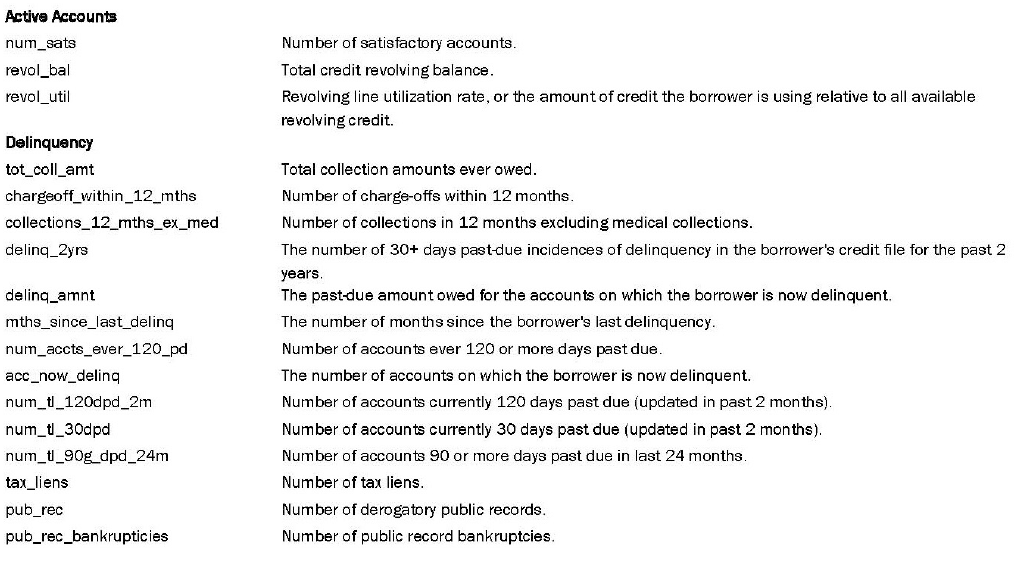

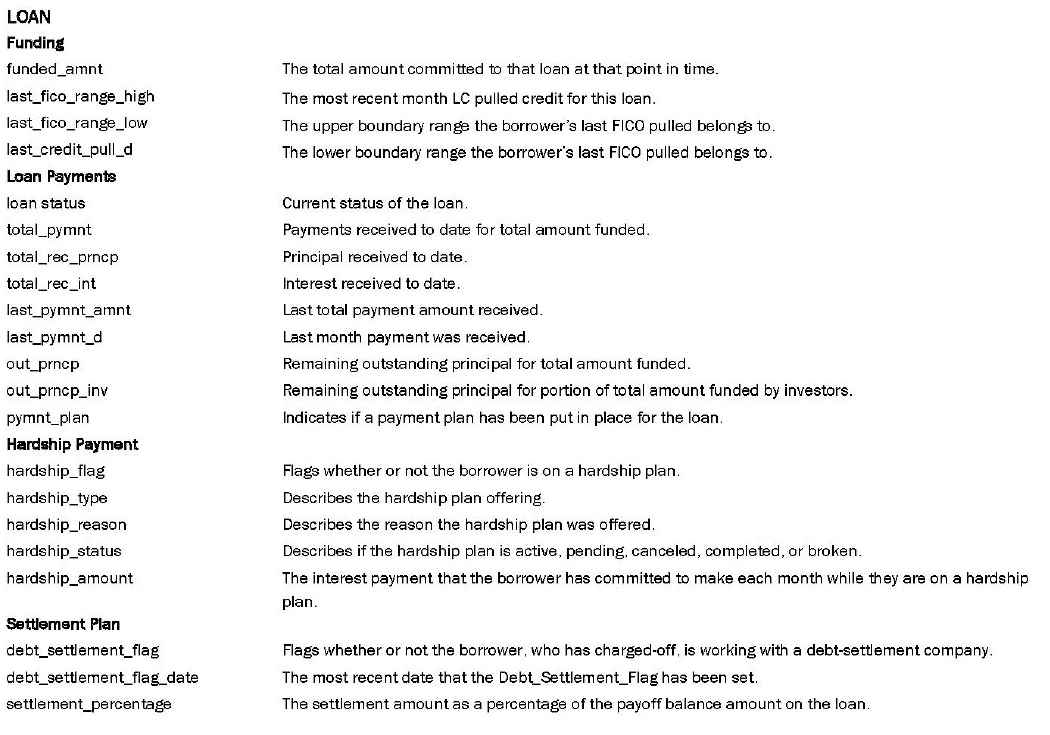